# Math for ML: Basic Math

Before getting started on machine learning proper we need to get a few fundamental topics out of the way. To really understand machine learning, you need to know some math. Not a *huge* amount of math, but the basics of a several fundamental topics for sure. These topics include things like basic math, numerical computation, linear algebra, calculus, optimization, probability, statistics, and algorithms.

In the first part of this series on Math for ML I'll focus on the most basic math concepts I think are important to know for starting with machine learning. These are things like elementary numbers and algebra, functions (both univariate and multivariate), sums and products, as well as basic set theory. I'll also present the Greek alphabet since it's helpful to be able to read and write many of these letters in machine learning.

Let's get started. I'm going to start by loading some helper functions from the `utils` subdirectory. This will help mostly with the plotting functions below. I'm also going to enable notebooks to print every line, not just the last line of a cell.

In [1]:
from utils.math_ml import *

In [2]:
# this makes every line of a cell print instead of just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Elementary Arithmetic and Algebra

It's useful in machine learning to be able to read and manipulate basic arithmetic and algebraic equations. I won't go into depth on the basics of high school arithmetic and algebra. I do have to assume *some* mathematical maturity of the reader, and this seems like a good place to draw the line. I'll just mention a few key points.

Recall that numbers can come in several forms. We can have,
- Positive whole numbers $$0, 1, 2, 3, 4, \cdots$$ These are sometimes called the **natural numbers** or the **positive integers**. Note the inclusion of $0$ in this group. Following the computer science convention I'll tend to do that.
- Whole numbers $$\cdots, -3, -2, -1, 0, 1, 2, 3, \cdots$$ These can be positive *or* negative. They're called the **integers**.
- Ratios of whole numbers, for example $$\frac{1}{2}, \frac{5}{4}, -\frac{3}{4}, \frac{1000}{999}, \cdots$$ Any ratio will do, so long as the *denominator* (the bottom number) is not zero. These are called the **rational numbers**.
- Arbitrary decimal numbers, for example $$1.00, \ 5.07956, \ -0.99999\dots, \ \pi=3.1415\dots, \ e=2.718\dots, \ \cdots$$ These are called the **real numbers**. They include as a special case both the integers and the rational numbers, but also include numbers that can't be represented as fractions, like $\pi$ and $e$.
- **Complex numbers** like $1 + 2i$ where $i=\sqrt{-1}$ is the imaginary number. Complex numbers include the real numbers as a special case. Since they don't really show up in machine learning we won't deal with these after this.

You should be familiar with the usual arithmetic operations defined on these systems of numbers. Things like addition, subtraction, multiplication, and division. You should also at least vaguely recall the order of operations, which defines the order in which complex arithmetic operations with parenthesis are carried out. For example,

$$(5+1) \cdot \frac{(7-3)^2}{2} = 6 \cdot \frac{4^2}{2} = 6 \cdot \frac{16}{2} = 6 \cdot 8 = 48.$$

You should be able to manipulate and simplify simple fractions by hand. For example,

$$\frac{3}{7} + \frac{1}{5} = \frac{3 \cdot 5 + 1 \cdot 7}{7 \cdot 5} = \frac{22}{35} \approx 0.62857.$$

As far as basic algebra goes, you should be familiar with algebraic expressions like $x+5=7$ and be able to solve for the unknown variable $x$,

$$x=7-5=2.$$

You should be able to take an equation like $ax + b = c$ and solve it for $x$ in terms of coefficients $a, b, c$,

$$
\begin{align}
ax + b &= c \\
ax &= c - b \\
x &= \frac{c - b}{a}.
\end{align}
$$

You should also be able to expand simple expressions like this,

$$
\begin{align}
(ax - b)^2 &= (ax - b)(ax - b) \\
&= (ax)^2 - (ax)b - b(ax) + b^2 \\
&= a^2x^2 - abx - abx + b^2 \\
&= a^2x^2 - 2abx + b^2.
\end{align}
$$

That's pretty much it. Just simple variable manipulation.

### Symbolic Computation

There are two fundamental ways to perform mathematical computations: numerical computation, and symbolic computation. You're familiar with both even though you may not realize it. **Numerical computation** involves crunching numbers. You plug in numbers, and get out numbers. When you type something like `10.5 / 12.4` in python, it will return a number, like `0.8467741935483871`. This is numerical computation.

In [3]:
10.5 / 12.4

0.8467741935483871

This contrasts with a way of doing computations that you learned in math class, where you manipulate symbols. This is called **symbolic computation**. Expanding an equation like $(ax-b)^2$ to get $a^2x^2 - 2abx + b^2$ is an example of a symbolic computation. You see the presence of abstract variables like $x$ that don't have a set numeric value.

Usually in practice we're interested in numerical computations. We'll mostly be doing that in this book. But sometimes, when working with equations, we'll need to do symbolic computations as well. Fortunately, python has a library called SymPy, or sympy, that can do symbolic computation automatically. I won't use it a whole lot in this book, but it will be convenient in a few places to show you that you don't need to manipulate mathematical expressions by hand all the time.

To use sympy, I'll import `sympy` with the alias `sp`. Before defining a function to operate on, we first have to encode all the symbols in the problem as sympy `Symbol` objects. Once that's done, we can create equations out of them and perform mathematical operations.

Here's an example of using sympy to expand the equation above, $(ax-b)^2$.

In [4]:
import sympy as sp

In [5]:
a = sp.Symbol('a'); a
b = sp.Symbol('b'); b
x = sp.Symbol('x'); x

a

b

x

In [6]:
equation = (a * x - b) ** 2
sp.expand(equation, x)

a**2*x**2 - 2*a*b*x + b**2

We can also use sympy to solve equations. Here's an example of solving the quadratic equation $x^2 = 6$ for its two roots, $x = \pm \sqrt{6}$.

In [7]:
equation = x**2 - 6
sp.solve(equation, x)

[-sqrt(6), sqrt(6)]

Sympy has a lot of functionality, and it can be a very difficult library to learn due to its often strange syntax for things. Since we won't really need it all that often I'll skip the in depth tutorial. See the [documentation](https://www.sympy.org/en/index.html) if you're interested.

## Univariate Functions

As I'm sure you've seen before, a mathematical function is a way to map inputs $x$ to outputs $y$. That is, a function $f(x)$ is a mapping that takes in a value $x$ and maps it to a unique value $y=f(x)$. These values can be either single numbers (called **scalars**), or multiple numbers (vectors or tensors). When $x$ and $y$ are both scalars, $f(x)$ is called a **univariate function**.

Let's quickly cover some of the common functions you'd have seen before in a math class, focusing mainly on the ones that show up in machine learning. I'll also cover a couple machine-learning specific functions you perhaps haven't seen before.

### Affine Functions

The most basic functions to be aware of are the straight-line functions: constant functions, linear functions, and affine functions:
- Constant functions $y=c$ or $x=c$: For example, $y=2$, $x=1$.
- Linear functions $y=ax$: For example, $y=-x$, $y=5x$.
- Affine functions $y=ax+b$: For example, $y=-x+1$, $y=5x-4$.

All constant functions are affine functions, and all linear functions are affine functions. In the case of affine functions, the value $b$ is called the **intercept**. It corresponds to the value where the function crosses the y-axis. The value $a$ is called the **slope**. It corresponds to the steepness of the curve, i.e. its height over its width (or "rise" over "run"). Notice linear functions are the special case where the intercept is *always* the origin $x=0, y=0$.

#### Plotting

We can plot these and any other univariate function $y=f(x)$ in the usual way you learned about in school. We sample a lot of $(x,y)$ pairs from the function, and plot them on a grid with a horizontal x-axis and vertical y-axis.

Before plotting some examples I need to mention that plotting in python is usually done with the `matplotlib` library. Typically what we'd do to get a very simple plot is:
1. Import `plt`, which is the alias to the submodule `matplotlib.pyplot`
2. Get a grid of `x` values we want to plot, e.g. using `np.linspace` or `np.arange`
3. Get a grid of `y` values either directly, or by first defining a python function `f(x)`
4. Plot x vs y by calling `plt.(x, y)`, followed by `plt.show()`.

Note step (2) requires another library called `numpy` to create the grid of points. You don't *have* to use numpy for this, but it's typically easiest. Usually numpy is imported with the alias `np`. We'll cover it in much more detail in future lessons.

Let me go ahead and load these libraries. I'll also show a simple example of a plot. What I'll do is define a grid `x` of 100 equally spaced points between -10 and 10, and plot the function $y=x-1$ using the method described above.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

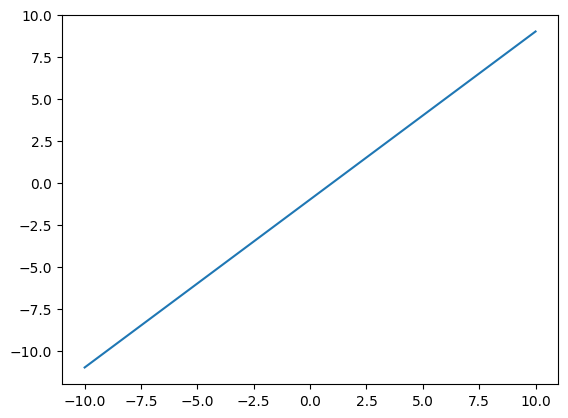

In [9]:
x = np.linspace(-10, 10, 100)
y = x - 1
plt.plot(x, y)
plt.show()

Unfortunately this plot is pretty ugly. It's too big, arbitrarily scaled, and doesn't include any information about what's being plotted against what. In matplotlib if you want to include all these things to make nice plots you have to include a bunch of extra style commands.

For this reason, for the rest of the plotting in this lesson I'm going to use a helper function `plot_function`, which takes in `x` and `y`, the range of `x` values we want to plot, and an optional title. I didn't think the details of this helper function were worth going into now, so I abstracted it away into the file `utils.py` in this same directory. It uses matplotlib like I described, but with a good bit of styling to make the plot more readable. If you really want to see the details perhaps the easiest thing to do is create a cell below and type the command `??plot_function`, which will print the code inside the function as the output.

Back to it, let's plot one example each of a constant function $y=2$, a linear function $y=2x$, and an affine function $2x-1$.

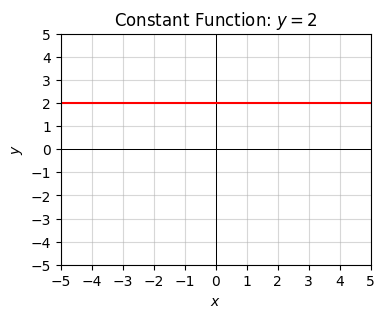

In [10]:
x = np.arange(-10, 10, 0.1)
f = lambda x: 2 * np.ones(len(x))
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Constant Function: $y=2$')

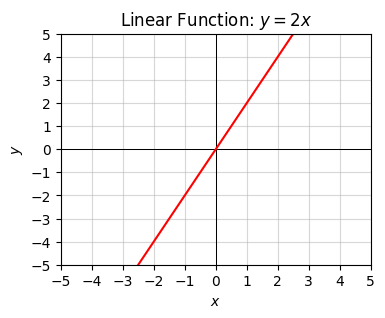

In [11]:
x = np.arange(-10, 10, 0.1)
f = lambda x: 2 * x
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Linear Function: $y=2x$')

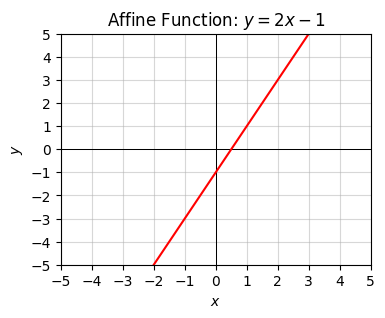

In [12]:
x = np.arange(-10, 10, 0.1)
f = lambda x: 2 * x - 1
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Affine Function: $y=2x-1$')

Note the following observations from each plot.
1. The constant function is horizontal.
2. The linear function is just a rightward-sloping line that passes through the origin $(0,0)$ and the point $(1,2)$.
3. The affine function is just the same linear function shifted *down* by one unit of $y$.

### Polynomial Functions

Polynomial functions are just sums of positive integer powers of $x$, e.g. something like $y=3x^2+5x+1$ or $y=x^{10}-x^{3}+4$. The highest power that shows up in the function is called the **degree** of the polynomial. For example, the above examples have degrees 2 and 10 respectively. Polynomial functions tend to look like lines, bowls, or roller coasters that turn up and down some number of times. 

A major example is the quadratic function $y=x^2$, which is just an upward-shaped bowl. Its bowl-shaped curve is called a **parabola**. We can get a downward-shaped bowl by flipping the sign to $y=-x^2$.

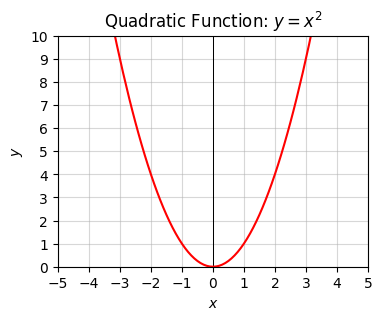

In [13]:
x = np.arange(-10, 10, 0.1)
f = lambda x: x ** 2
plot_function(x, f, xlim=(-5, 5), ylim=(0, 10), title='Quadratic Function: $y=x^2$')

The next one up is the cubic function $y=x^3$. The cubic looks completely different from the bowl-shaped parabola.

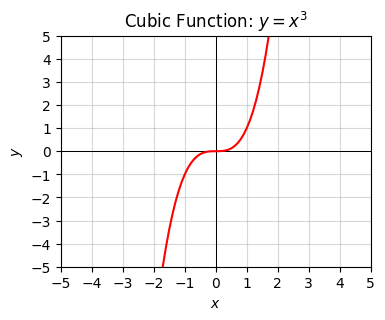

In [14]:
x = np.arange(-10, 10, 0.1)
f = lambda x: x ** 3
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Cubic Function: $y=x^3$')

Polynomials can take on much more interesting shapes than this. Here's a more interesting polynomial degree 10,

$$y = (x^2 - 1)^5 - 5(x^2 - 1)^4 + 10(x^2 - 1)^3 - 10(x^2 - 1)^2 + 5(x^2 - 1) - 1.$$

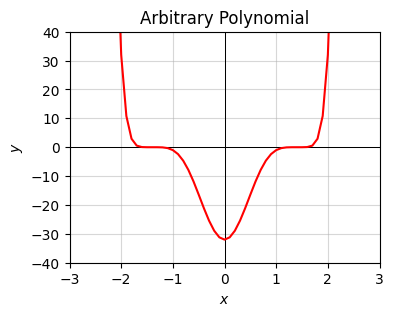

In [15]:
x = np.arange(-10, 10, 0.1)
f = lambda x: (x**2 - 1)**5 - 5 * (x**2 - 1)**4 + 10 * (x**2 - 1)**3 - 10 * (x**2 - 1)**2 + 5 * (x**2 - 1) - 1
plot_function(x, f, xlim=(-3, 3), ylim=(-40, 40), set_ticks=False, title='Arbitrary Polynomial')

### Rational Functions

Rational functions are functions that are ratios of polynomial functions. Examples might be $y=\frac{1}{x}$, or 

$$y=\frac{x^3+x+1}{x^2-1}.$$

These functions typically look kind of like polynomial functions, but have points where the curve "blows up" to positive or negative infinity. The points where the function blows up are called **poles** or **asymptotes**.

Here's a plot of the function

$$y=\frac{x^3+x+1}{x^2-1}.$$

Notice how weird it looks. There are asymptotes (the vertical lines) where the function blows up at $\pm 1$, which is where the denominator $x^2-1=0$.

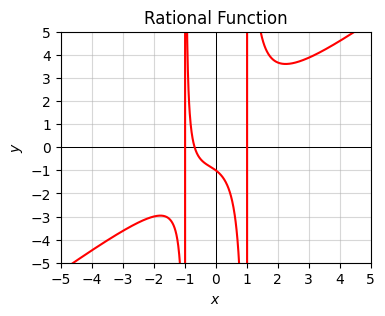

In [16]:
x = np.arange(-10, 10, 0.01)
f = lambda x: (x ** 3 + x + 1) / (x ** 2 - 1)
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Rational Function')

Here's a plot of $y=\frac{1}{x}$. There's an asymptote at $x=0$. When $x > 0$ it starts at $+\infty$ and tapers down to $0$ as $x$ gets large. When $x < 0$ it does the same thing, except flipped across the origin $x=y=0$. This is an example of an **odd function**, a function that looks like $f(x)=-f(x)$, which is clear in this case since $1/(-x)=-1/x$. Functions like the linear function $y=x$ and the cubic function $y=x^3$ are also odd functions.

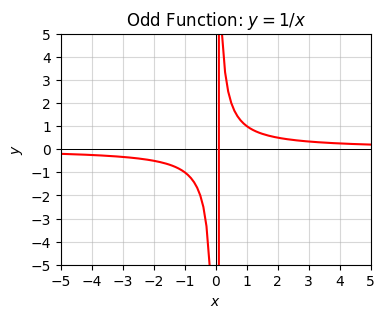

In [17]:
x = np.arange(-10, 10, 0.1)
f = lambda x: 1 / x
plot_function(x, f, xlim=(-5, 5), ylim=(-5, 5), title='Odd Function: $y=1/x$')

A related function is $y=\frac{1}{|x|}$. The difference here is that $|x|$ can never be negative. This means $f(x)=f(-x)$. This is called an **even function**. Functions like this are symmetric across the y-axis. The quadratic function $y=x^2$ is also an even function.

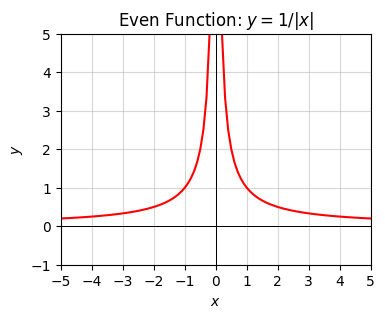

In [18]:
x = np.arange(-10, 10, 0.1)
f = lambda x: 1 / np.abs(x)
plot_function(x, f, xlim=(-5, 5), ylim=(-1, 5), title='Even Function: $y=1/|x|$')

### Power Functions

Functions that look like $y=\frac{1}{x^n}$ for some $n$ are sometimes called inverse, hyperbolic. These can be represented more easily by using a negative power like $y=x^{-n}$, which means the exact same thing as $y=\frac{1}{x^n}$.

We can extend $n$ to deal with things like square roots or cube roots or any kind of root as well by allowing $n$ to be non-integer. For example, we can represent the square root function $y=\sqrt{x}$ as $y=x^{1/2}$, and the cube root $y=\sqrt[3]{x}$ as $y=x^{1/3}$. Roots like these are only defined when $x \geq 0$.

The general class of functions of the form $y=x^p$ for some arbitrary real number $p$ are often called **power functions**.

Here's a plot of what the square root function looks like. Here $y$ grows slower than a linear function, but still grows arbitrarily large with $x$.

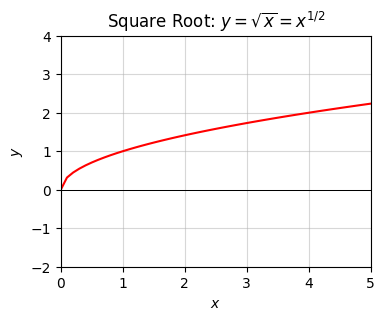

In [19]:
x = np.arange(0, 10, 0.1)
f = lambda x: np.sqrt(x)
plot_function(x, f, xlim=(0, 5), ylim=(-2, 4), title='Square Root: $y=\sqrt{x}=x^{1/2}$')

Power functions obey the following rules:

<table width="50%">
  <tr>
    <th>Rule</th>
    <th>Example</th>
  </tr>
  <tr>
    <td style="width: 50ch">$x^0 = 1$</td>
    <td style="width: 50ch">$2^0 = 1$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{m+n} = x^m x^n$</td>
    <td style="width: 50ch">$3^{2+5} = 3^2 3^5 = 3^8 = 6561$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{m-n} = \frac{x^m}{x^n}$</td>
    <td style="width: 50ch">$3^{2-5} = \frac{3^2}{3^5} = 3^{-3} \approx 0.037$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{mn} = (x^m)^n$</td>
    <td style="width: 50ch">$2^{2 \cdot 5} = (2^2)^5 = 2^{10} = 1024$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$(xy)^n = x^n y^n$</td>
    <td style="width: 50ch">$(2 \cdot 2)^3 = 2^3 2^3 = 4^3 = 2^6 = 64$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\big(\frac{x}{y}\big)^n = \frac{x^n}{y^n}$</td>
    <td style="width: 50ch">$\big(\frac{2}{4}\big)^3 = \frac{2^3}{4^3} = \frac{1}{8}$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\big(\frac{x}{y}\big)^{-n} = \frac{y^n}{x^n}$</td>
    <td style="width: 50ch">$\big(\frac{2}{4}\big)^{-3} = \frac{4^3}{2^3} = 2^3 = 8$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{1/2} = \sqrt{x} = \sqrt[2]{x}$</td>
    <td style="width: 50ch">$4^{1/2} = \sqrt{4} = 2$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{1/n} = \sqrt[n]{x}$</td>
    <td style="width: 50ch">$3^{1/4} = \sqrt[4]{3} \approx 1.316$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$x^{m/n} = \sqrt[n]{x^m}$</td>
    <td style="width: 50ch">$3^{3/4} = \sqrt[4]{3^3} = \sqrt[4]{9} \approx 1.732$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\sqrt[n]{xy} = \sqrt[n]{x} \sqrt[n]{y}$</td>
    <td style="width: 50ch">$\sqrt[4]{3 \cdot 2} = \sqrt[4]{3} \sqrt[4]{2} \approx 1.565$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\sqrt[n]{\frac{x}{y}} = \frac{\sqrt[n]{x}}{\sqrt[n]{y}}$</td>
    <td style="width: 50ch">$\sqrt[4]{\frac{3}{2}} = \frac{\sqrt[4]{3}}{\sqrt[4]{2}} \approx 1.107$</td>
  </tr>
</table>

It's important to remember that power functions *do not* distribute over addition, i.e.

$$(x+y)^n \neq x^n + y^n,$$

and by extension nor do roots,

$$\sqrt[n]{x+y} \neq \sqrt[n]{x} + \sqrt[n]{y}.$$

### Exponentials and Logarithms

Two very important functions are the exponential function $y=\exp(x)$ and the logarithm function $y=\log(x)$. They show up surprisingly often in machine learning and the sciences, certainly more than most other special functions do.

The exponential function can be written as a power by defining a number $e$ called Euler's number, given by $e = 2.71828\dots$ . Like $\pi$, $e$ is an example of an irrational number, i.e. a number that can't be represented as a ratio of integers. Using $e$, we can write the exponential function in the more usual form $y=e^x$, where it's roughly speaking understood that we mean "multiply $e$ by itself $x$ times". For example, $\exp(2) = e^2 = e \cdot e$.

The logarithm is defined as the inverse of the exponential function. It's the unique function satisfying $\log(\exp(x)) = x$. The opposite is also true since the exponential must then be the inverse of the logarithm function, $\exp(\log(x)) = x$. This gives a way of mapping between the two functions,

$$\log(a) = b \quad \Longleftrightarrow \quad \exp(b) = a.$$

Here are some plots of what the exponential and logarithm functions look like. The exponential function is a function that blows up very, very quickly. The log function grows very, very slowly (much more slowly than the square root does).

Note the log function is only defined for positive-valued numbers $x \geq 0$, with $\log(+0)=-\infty$. This is dual to the exponential function only taking on $y \geq 0$.

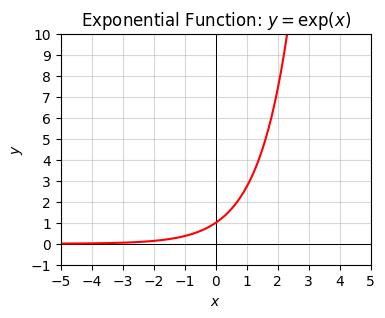

In [20]:
x = np.arange(-5, 5, 0.1)
f = lambda x: np.exp(x)
plot_function(x, f, xlim=(-5, 5), ylim=(-1, 10), title='Exponential Function: $y=\exp(x)$')

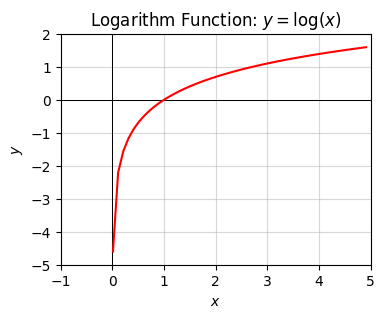

In [21]:
x = np.arange(0.01, 5, 0.1)
f = lambda x: np.log(x)
plot_function(x, f, xlim=(-1, 5), ylim=(-5, 2), title='Logarithm Function: $y=\log(x)$')

The exponential and logarithm functions I defined are the "natural" way to define these functions. We can also have exponential functions in other bases, $y=a^x$ for any positive number $a$. Each $a$ has an equivalent logarithm, written $y = \log_{a}(x)$. The two functions $y=a^x$ and $y=\log_{a}(x)$ are inverses of each other. When I leave off the $a$, it's assumed that all logs are the natural base $a=e$, sometimes also written $\ln(x)$.

Two common examples of other bases that show up sometimes are the base-2 functions $2^x$ and $\log_{2}(x)$, and the base-10 functions $10^x$ and $\log_{10}(x)$. Base-2 functions in particular show up often in computer science because of the tendency to think in bits. Base-10 functions show up when we want to think about how many digits a number has.

Here are some rules that exponentials and logs obey:

<table width="60%">
  <tr>
    <th>Rule</th>
    <th>Example</th>
  </tr>
  <tr>
    <td style="width: 50ch">$e^0 = 1$</td>
    <td style="width: 50ch"></td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log(1) = 0$</td>
    <td style="width: 50ch"></td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log(e) = 1$</td>
    <td style="width: 50ch"></td>
  </tr>
  <tr>
    <td style="width: 50ch">$e^{a+b} = e^a e^b$</td>
    <td style="width: 50ch">$e^{2+5} = e^2 e^5 = e^8 \approx 2980.96$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$e^{a-b} = \frac{e^a}{e^b}$</td>
    <td style="width: 50ch">$e^{2-5} = \frac{e^2}{e^5} = e^{-3} \approx 0.0498$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$e^{ab} = (e^a)^b$</td>
    <td style="width: 50ch">$e^{2 \cdot 5} = (e^2)^5 = e^{10} \approx 22026.47$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$a^b = e^{b \log(a)}$</td>
    <td style="width: 50ch">$2^3 = e^{3 \log(2)} = 8$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log(ab) = \log(a) + \log(b)$</td>
    <td style="width: 50ch">$\log(2 \cdot 5) = \log(2) + \log(5) = \log(10) \approx 2.303$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log\big(\frac{a}{b}\big) = \log(a) - \log(b)$</td>
    <td style="width: 50ch">$\log\big(\frac{2}{5}\big) = \log(2) - \log(5) \approx -0.916$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log(a^b) = b\log(a)$</td>
    <td style="width: 50ch">$\log(5^2) = 2\log(5) \approx 3.219$</td>
  </tr>
  <tr>
    <td style="width: 50ch">$\log_a(x) = \frac{\log(x)}{\log(a)}$</td>
    <td style="width: 50ch">$\log_2(5) = \frac{\log(5)}{\log(2)} \approx 2.322$</td>
  </tr>
</table>

Here's an example of an equation involving exponentials and logs. Suppose you have $n$ bits of numbers (perhaps it's the precision in some float) and you want to know how many *digits* this number takes up in decimal form (what you're used to). This would be equivalent to solving the following equation for $x$,

$$
\begin{align}
2^n &= 10^{x} \\
\log(2^n) &= \log(10^{x}) \\
n\log(2) &= x\log(10) \\
x &= \frac{\log(2)}{\log(10)} \cdot n \\
x &\approx 0.3 \cdot n.
\end{align}
$$

For example, you can use this formula to show that 52 bits of floating point precision translates to about 15 to 16 digits of precision. In numpy, the function `np.log` function calculates the (base-$e$) log of a number.

In [22]:
n = 52
x = np.log(2) / np.log(10) * n
x

15.65355977452702

### Trigonometric Functions

Other textbook functions typically covered in math courses are the trig functions: sine, cosine, tangent, cosine, cosecant, and cotangent. Of these functions, the most important to know are the sine function $y=\sin x$, and the cosine function $y = \cos x$.

Here's what their plots look like. They're both waves that repeat themselves, in the sense $f(x + 2\pi) = f(x)$. The length for the function to repeat itself is called the *period*, in this case $2\pi \approx 6.28$. Note that the cosine is just a sine function that's shifted right by $\frac{\pi}{2} \approx 1.57$.

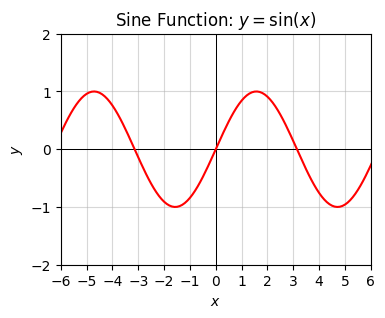

In [23]:
x = np.arange(-10, 10, 0.1)
f = lambda x: np.sin(x)
plot_function(x, f, xlim=(-6, 6), ylim=(-2, 2),  title='Sine Function: $y=\sin(x)$')

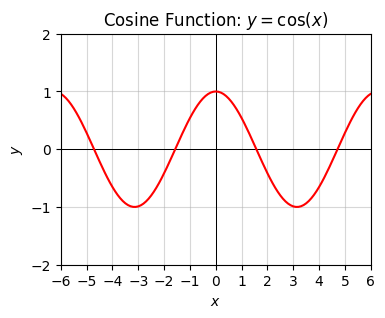

In [24]:
x = np.arange(-10, 10, 0.1)
f = lambda x: np.cos(x)
plot_function(x, f, xlim=(-6, 6), ylim=(-2, 2), title='Cosine Function: $y=\cos(x)$')

Trig functions don't really show up that much in machine learning, so I won't remind you of all those obscure trig rules you've forgotten. I'll just mention that we can define all the other trig functions using the sine and cosine as follows,

$$
\begin{align}
&\tan x = \frac{\sin x}{\cos x}, \\
&\csc x = \frac{1}{\sin x}, \\
&\sec x = \frac{1}{\cos x}, \\
&\cot x = \frac{1}{\tan x} = \frac{\cos x}{\sin x}.
\end{align}
$$

### Piecewise Functions

The functions covered so far are examples of **continuous functions**. Their graphs don't have jumps or holes in them anywhere. Continuous functions we can often write using a single equation, like $y=x^2$ or $y=1 + \sin(x)$. We can also have functions that require more than one equation to write. These are called **piecewise functions**. Piecewise functions usually aren't continuous, but sometimes can be.

An example of a discontinuous piecewise function is the unit step function $y=u(x)$ given by

$$
y = 
\begin{cases}
0 & x < 0, \\
1 & x \geq 0.
\end{cases}
$$

This expression means $y=0$ whenever $x < 0$, but $y=1$ whenever $x \geq 0$. It breaks up into two pieces, one horizontal line $y=0$ when $x$ is negative, and another horizontal line $y=1$ when $x$ is positive. 

Using Boolean expressions, we can also write this function in a more economical way by agreeing to identify $x=1$ with $\text{TRUE}$ and $x=0$ with $\text{FALSE}$, which python does by default. In this notation, we can write 

$$u(x) = [x \geq 0],$$

which means exactly the same thing as the piecewise definition, since $x \geq 0$ is only true when (you guessed it), $x \geq 0$.

Here's a plot of this function. Note the discontinuous jump at $x=0$.

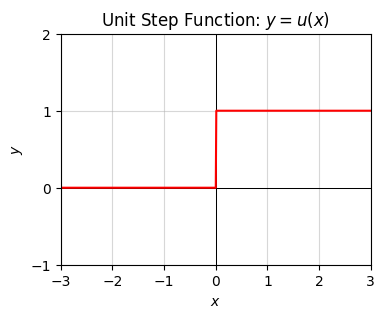

In [25]:
x = np.arange(-10, 10, 0.01)
f = lambda x:  (x >= 0)
plot_function(x, f, xlim=(-3, 3), ylim=(-1, 2), title='Unit Step Function: $y=u(x)$')

An example of a piecewise function that's continuous is the **ramp function**, defined by

$$
y = 
\begin{cases}
0 & x < 0, \\
x & x \geq 0.
\end{cases}
$$

This function gives a horizontal line $y=0$ when $x$ is negative, and a $45^\circ$ line $y=x$ when $x$ is positive. Both lines connect at $x=0$, but leave a kink in the graph.

Another way to write the same thing using Boolean expressions is $y = x \cdot [x \geq 0]$, which is of course just $y = x \cdot u(x)$.

In machine learning it's more common to write the ramp function using the $\max$ function as $y = \max(0,x)$. This means, for each $x$, take that value and compare it with $0$, and take the maximum of those two. That is, if $x$ is negative take $y=0$, otherwise take $y=x$. It's also more common to call this function a **rectified linear unit**, or **ReLU** for short. It's an ugly, unintuitive name, but unfortunately it's stuck in the field.

Here's a plot of the ramp or ReLU function. Notice how it stays at $y=0$ for a while, then suddenly "ramps upward" at $x=0$.

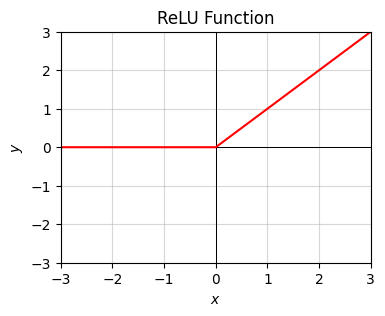

In [26]:
x = np.arange(-10, 10, 0.1)
f = lambda x:  x * (x >= 0)
plot_function(x, f, xlim=(-3, 3), ylim=(-3, 3), title='ReLU Function')

Last, I'll mention here the **absolute value** function $y = |x|$, defined by the piecewise function

$$
y = \begin{cases}
x & \text{if } x \ge 0 \\
-x & \text{if } x < 0.
\end{cases}
$$

The absolute value just ignores negative signs and makes everything positive. The function looks like the usual line $y=x$ when positive, but like the negative-sloped line $y=-x$ when negative. At $x=0$ the two lines meet, creating a distinctive v-shape. To get the absolute value function in python, use `abs` or `np.abs`.

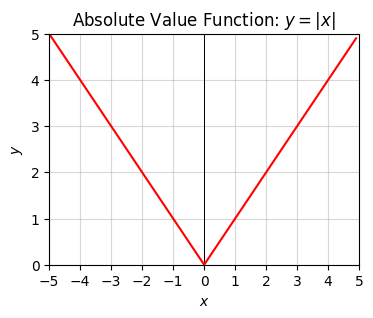

In [27]:
x = np.arange(-5, 5, 0.1)
f = lambda x: abs(x)
plot_function(x, f, xlim=(-5, 5), ylim=(0, 5), title='Absolute Value Function: $y=|x|$')

### Composite Functions

We can also have any arbitrary hybrid of the above functions. We can apply exponentials to affine functions, logs to sine functions, sines to exponential functions. In essence, this kind of layered composition of functions is what a neural network is as we'll see later on.

Math folks often write an abstract compositional function as a function applied to another function, like $y=f(g(x))$ or $y=(f \circ g)(x)$. These can be chained arbitrarily many times, not just two. Neural networks do just that, often hundreds or thousands of times.

Consider, for example, the function composition done by applying the following functions in sequence:
- an affine function $y=wx+b$
- followed by a linear function $y=-x$
- followed by an exponential function $y=e^x$
- followed by a rational function $y=\frac{1}{x}$

to get the full function
$$y = \frac{1}{1 + e^{-(wx+b)}}.$$

Here's a plot of what this function looks like for the "standard form" where $w=1, b=0$. Notice that $0 \leq y \leq 1$. The values of $x$ get "squashed" to values between 0 and 1 after the function is applied.

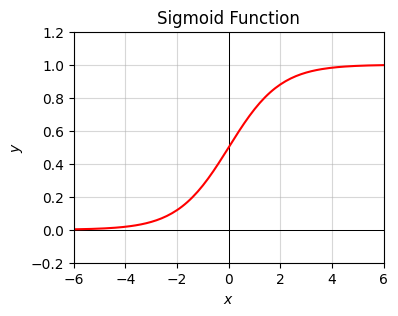

In [28]:
x = np.arange(-10, 10, 0.1)
f = lambda x:  1 / (1 + np.exp(-x))
plot_function(x, f, xlim=(-6, 6), ylim=(-0.2, 1.2), set_ticks=False, title='Sigmoid Function')

This function is called the **sigmoid** function. The sigmoid is very important in machine learning since it in essence creates probabilities. We'll see it a lot more. The standard form sigmoid function, usually written

$\sigma(x)$, is given by $$\sigma(x) = \frac{1}{1 + e^{-x}}.$$

Arbitrary affine transformations of the standard form would then be written as $\sigma(wx+b)$.

A similar looking function shows up sometimes as well called the **hyperbolic tangent** or **tanh** function, which has the (standard) form

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}.$$

The tanh function looks pretty much the same as the sigmoid except it's rescaled vertically so that $-1 \leq y \leq 1$.

Here's a plot of the tanh function. Notice how similar it looks to the sigmoid with the exception of the scale of the y-axis.

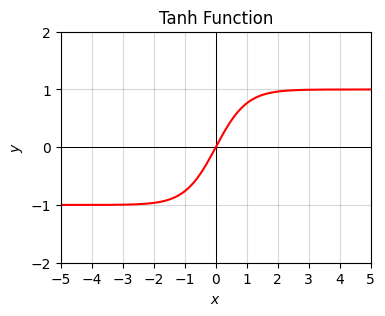

In [29]:
x = np.arange(-10, 10, 0.1)
f = lambda x: (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plot_function(x, f, xlim=(-5, 5), ylim=(-2, 2), title='Tanh Function')

### Function Transformations

Suppose we have some arbitrary function $f(x)$ and we apply a series of compositions to get a new function $$g(x)=a \cdot f(b \cdot (x + c)) + d.$$ We can regard each parameter $a,b,c,d$ as doing some kind of geometric transformation to the graph of the original function $f(x)$. Namely,
- $a$ re-scales the function vertically (if $a$ is negative it also flips $f(x)$ upside down)
- $b$ re-scales the function horizontally (if $b$ is negative it also flips $f(x)$ left to right)
- $c$ shifts the function horizontally (left if $c$ is positive, right if $c$ is negative)
- $d$ shifts the function vertically (up if $d$ is positive, down if $d$ is negative)

Here's an example of how these work. Consider the function $f(x)=x^2$. We're going to apply each of these transformations one by one to show what they do to the graph of $f(x)$.

First, let's look at the transformation $g(x) = \frac{1}{2} f(x) = \frac{1}{2} x^2$. Here $a=\frac{1}{2}$ and the rest are zero. I'll plot it along side the original graph (the blue curve). Notice the graph gets flattened vertically by a factor of two (the orange curve).

In [30]:
x = np.arange(-10, 10, 0.1)
f = lambda x: x ** 2

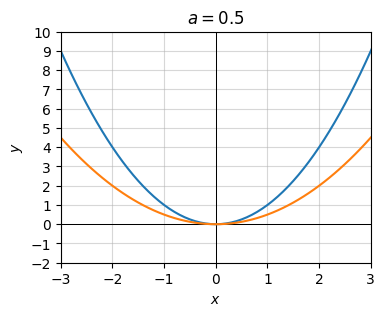

In [31]:
a = 1 / 2
g = lambda x: a * x ** 2
plot_function(x, (f, g), xlim=(-3, 3), ylim=(-2, 10), title=f'$a={a}$')

Now consider at the transformation 

$$g(x) = f\big(\frac{1}{2} x\big) = \bigg(\frac{1}{2} x \bigg)^2.$$ 

Here $b=\frac{1}{2}$ and the rest are zero. Notice the graph again gets flattened but in a slightly different way.

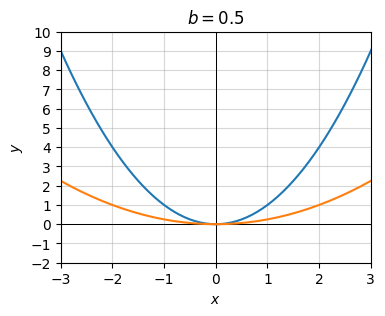

In [32]:
b = 1 / 2
g = lambda x: (b * x) ** 2
plot_function(x, (f, g), xlim=(-3, 3), ylim=(-2, 10), title=f'$b={b}$')

Next, consider the transformation $g(x) = f(x-1) = (x-1)^2.$ Here $c=1$ and the rest are zero. Notice the graph's shape doesn't change. It just gets shifted *right* by $c=1$ since $c$ is negative.

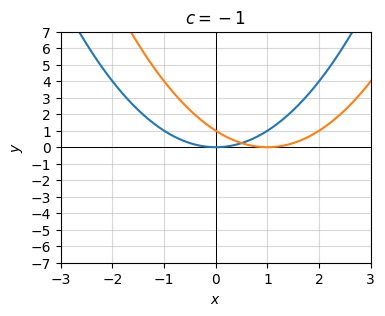

In [33]:
c = -1
g = lambda x: (x + c) ** 2
plot_function(x, (f, g), xlim=(-3, 3), ylim=(-7, 7), title=f'$c={c}$')

Finally, let's look at the transformation $g(x) = f(x) + 2 = x^2 + 2$. Here $d=2$ and the rest are zero. Notice again the graph's shape doesn't change. It just gets shifted *up* by $d=2$ units.

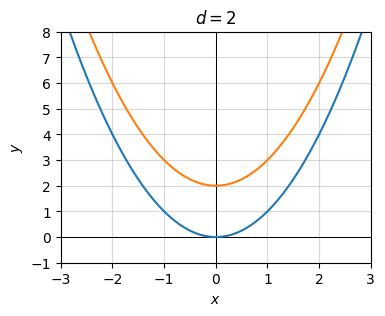

In [34]:
d = 2
g = lambda x: x ** 2 + d
plot_function(x, (f, g), xlim=(-3, 3), ylim=(-1, 8), title=f'$d={d}$')

Let's now put them all together to see what happens. We should see rescaling in both directions and shifts in both directions. It's hard to see in the plot, but it's all there if you zoom in. The vertex of the parabola is at the point $x=c=1, y=d=2$. And the stretching factors due to $a=b=1/2$ are both acting to flatten the parabola.

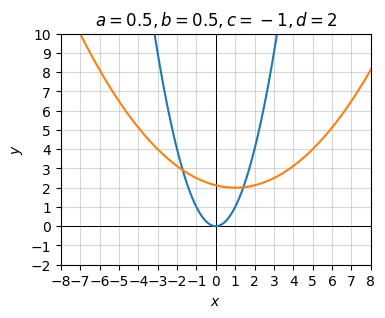

In [35]:
g = lambda x: a * (b * (x + c)) ** 2 + d
plot_function(x, (f, g), xlim=(-8, 8), ylim=(-2, 10), title=f'$a={a}, b={b}, c={c}, d={d}$')

## Multivariate Functions

What we've covered thus far only deals with univariate functions, functions where $y=f(x)$, but $x$ and $y$ are just single numbers, i.e. scalars. In machine learning we're almost always dealing with multivariate functions with *lots* of variables, sometimes billions of them. It turns out that most of what I've covered so far extends straight forwardly to multivariate functions with some small caveats, which I'll cover below.

Simply put, a multivariate function is a function of multiple variables. Instead of a single variable $x$, we might have several variables, e.g. $x_0, x_1, x_2, x_3, x_4, x_5$,

$$y = f(x_0, x_1, x_2, x_3, x_4, x_5).$$

If you think about mathematical functions analogously to python functions it shouldn't be surprising functions can have multiple arguments. They usually do, in fact.

Here's an example of a function that takes two arguments $x$ and $y$ and produces a single output $z$, more often written as $z=f(x,y)$. The function we'll look at is $z = x^2 + y^2$. I'll evaluate the function at three points:
- $x=0$, $y=0$,
- $x=1$, $y=-1$,
- $x=0$, $y=1$.

The main thing to notice is the function does exactly what you think it does. If you plug in 2 values, you get out 1 value.

In [36]:
f = lambda x, y: x ** 2 + y ** 2
print(f'z = {f(0, 0)}')
print(f'z = {f(1, -1)}')
print(f'z = {f(0, 1)}')

z = 0
z = 2
z = 1


We can also have functions that map multiple inputs to multiple outputs. Suppose we have a function that takes in 2 values $x_0, x_1$ and outputs 2 values $y_0, y_1$. We'd write this as $(y_0, y_1) = f(x_0, x_1)$. 

Consider the following example,

$$(y_0, y_1) = f(x_0, x_1) = (x_0+x_1, x_0-x_1).$$

This is really just two functions, both functions of $x_0$ and $x_1$. We can completely equivalently write this function as

$$y_0 = f_1(x_0, x_1) = x_0+x_1,$$
$$y_1 = f_2(x_0, x_1) = x_0-x_1.$$

Here's this function defined and evaluated at the point $x_0=1$, $x_1=1$.

In [37]:
f = lambda x0, x1: (x0 + x1, x0 - x1)
print(f'(y0, y1) = {f(1, 1)}')

(y0, y1) = (2, 0)


For now I'll just focus on the case of multiple inputs, single output like the first example. These are usually called **scalar-valued functions**. We can also have **vector-valued functions**, which are functions whose *outputs* can have multiple values as well. I'll focus on scalar-valued functions here.

A scalar-valued function of $n$ variables $x_0, x_1, \cdots, x_{n-1}$ has the form

$$y = f(x_0, x_1, \cdots, x_{n-1}).$$

Note $n$ can be as large as we want it to be. When working with deep neural networks (which are just multivariate functions of a certain form) $n$ can be huge. For example, if the input is a $256 \times 256$ image, the input might be $256^2=65536$ pixels. For a 10 second audio clip that's sampled at 44 kHz, the input might be $10*44k=440k$ amplitudes. Large numbers indeed.

Calculating the output of multivariate functions is just as straight-forward as for univariate functions pretty much. Unfortunately, visualizing them is much harder. The human eye can't see 65536 dimensions, only 3 dimensions. This in some sense means we need to give up on the ability to "graph" a function and instead find other ways to visualize it.

One thing that sometimes help to visualize high dimension functions is to pretend they're functions of two variables, like $z=f(x,y)$. In this special case we can visualize the inputs as an xy-plane, and the output as a third axis sticking out perpendicular to the xy-plane from the origin. Each $x,y$ pair will map to one unique $z$ value. Done this way, we won't get a graph of a *curve* as before, but a *surface*.

Here's an example of what this might look like for the simple function $z=x^2+y^2$. I'll plot the function on the domain $-10 \leq x \leq 10$ and $-10 \leq y \leq 10$ using the helper function `plot_3d`. It takes in two lists of values `x` and `y`. I'll use `np.linspace` to sample 100 points from -10 to 10 for each. Then I'll define a lambda function that maps `x` and `y` to the output `z`. Passing these three arguments into the helper function gives us our 3D plot.

In [38]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
f = lambda x, y: x**2 + y**2

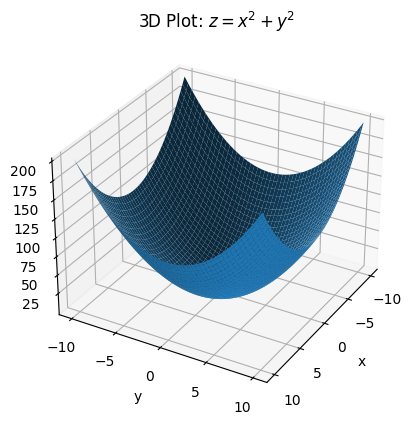

In [39]:
plot_3d(x, y, f, title='3D Plot: $z=x^2+y^2$')

Notice how the plot looks like an upward facing bowl. Imagine a bowl lying on a table. The table is the xy-plane. The bowl is the surface $z=x^2+y^2$ we're plotting. While the plot shows the general idea what's going on, 3D plots can often be difficult to look at. They're often slanted at funny angles and hide important details.

Here's another way we can visualize the same function: Rather than create a third axis for $z$, we can plot it directly on the xy-plane as a 2D plot. Since we're dealing with a surface, not a curve, we have to do this for lots of different $z$ values, which will give a *family* of curves. For example, we might plot all of the following curves corresponding to different values of $z$ in the xy-plane,

$$
\begin{align}
25 &= x^2 + y^2, \\
50 &= x^2 + y^2, \\
75 &= x^2 + y^2, \\
100 &= x^2 + y^2, \\
125 &= x^2 + y^2, \\
150 &= x^2 + y^2.
\end{align}
$$

Doing this will give a family of curves on one 2D plot, with each curve representing some value of $z$. In our example, these curves are all circles of radius $z^2$. Each curve is called a **level curve** or **level set**.

These kinds of plots are called **contour plots**. A contour map can be thought of as looking at the surface from the top down, where each level set corresponds to slicing the function $z=f(x,y)$ horizontally for different values of $z$. This trick is often used in topographical maps to visualize 3D terrain on a 2D sheet of paper. Here is a contour plot for $z=x^2+y^2$ using the above level curves.

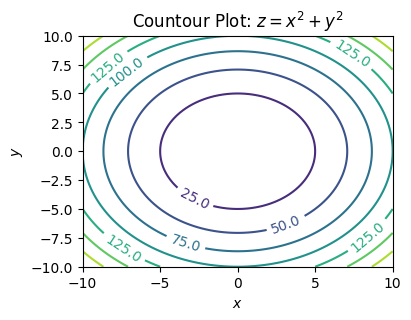

In [40]:
plot_countour(x, y, f, title='Countour Plot: $z=x^2+y^2$')

Notice how we get a bunch of concentric rings in the contour plot, each labeled by some value (their $z$ values). These rings correspond to the circles I was talking about. You can visually imagine this plot as looking down from the top of the bowl. In the middle you see the bottom. The rings get closer together the further out you go, which indicates that the bowl is sloping steeper the further out we get.

We'll see more examples of multivariate functions in the coming lessons.

## Sums and Products

Since in machine learning we typically find ourselves performing operations on large numbers of numbers at a time. By far the most common operation is adding up a bunch of numbers, or **summation**. Suppose we have some **sequence** of $n$ numbers $x_0,x_1,x_2,\cdots,x_{n-1}$. They could be anything, related by a function, or not. If we wanted to sum them together to get a new number $x$ we could write

$$x = x_0 + x_1 + x_2 + \cdots + x_{n-1}.$$

But it's kind of cumbersome to always write like this. For this reason in math there's a more compact notation to write sums called **summation notation**. We introduce the symbol $\sum$ for "sum", and write
$$x = \sum_{i=0}^{n-1} x_i.$$

Read this as "the sum of all $x_i$ for $i=0,1,\cdots,n-1$ is $x$". This is much more compact and more frequently used than writing a sum out like $x_0 + x_1 + x_2 + \cdots + x_{n-1}$.

The index $i$ being summed over is called a **dummy index**. It can be whatever we want since it never appears on the left-hand side. It gets summed over and then disappears. The lower and upper values $i=0$ and $i=n-1$ are called the **limits** of the summation. They can also be whatever we want them to be, not just $i=0$ and $i=n-1$.

Frequently summation notation is paired with some kind of function that generates the sequence $x_i$. For example, suppose our sequence is generated by the function $x_i = i$, and we want to sum from $i=1$ to $i=n$. We'd have

$$x = \sum_{i=1}^n x_i = \sum_{i=1}^n i = 1 + 2 + \cdots + n = \frac{1}{2} n(n+1).$$

The right-hand term $\frac{1}{2} n(n-1)$ is not obvious, and only applies to this particular sum. I just wrote it down since it's sometimes useful to remember. This is a special kind of sum called an **arithmetic series**. Here's a "proof" of this relationship using sympy.

In [41]:
i, n = sp.symbols('i n')
sp.Sum(i, (i, 1, n)).doit()

n**2/2 + n/2

In the general case when we don't have nice rules like this we'd have to loop over the entire sum and do the sum incrementally.

In python, the equivalent of summation notation is the `sum` function, where we pass in the sequence we want to sum as a list. Here's the arithmetic sum up to $n=10$, which should be $\frac{1}{2} 10 \cdot (10+1) = 55$.

In [42]:
sum([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

55

Another useful sum to be aware of is the **geometric series**. A geometric series is a sum over a sequence whose generating function is $x_i = r^i$ for some real number $r \neq 1$. Its rule is

$$x = \sum_{i=0}^{n-1} r^i = r^0 + r^1 + \cdots + r^{n-1} = \frac{1-r^n}{1-r}.$$

For example, if $n=10$ and $r=\frac{1}{2}$, we have

$$x = \sum_{i=0}^{9} \bigg(\frac{1}{2}\bigg)^i = \frac{1-\big(\frac{1}{2}\big)^{10}}{1-\big(\frac{1}{2}\big)} = 2\bigg(1-\frac{1}{2^{10}}\bigg) \approx 1.998.$$

In [43]:
r = 1 / 2
n = 10
sum([r ** i for i in range(n)])

1.998046875

Notice how the term $\big(\frac{1}{2}\big)^{10} \approx 0.00098$ is really small. We can practically ignore it. In fact, as $n \rightarrow \infty$ we can completely ignore it, in which case

$$x = \sum_{i=0}^{\infty} \bigg(\frac{1}{2}\bigg)^i = \frac{1}{1-\big(\frac{1}{2}\big)} = 2.$$

This is an example of the infinite version of the geometric series. If $0 \leq r \leq 1$, then

$$x = \sum_{i=0}^{\infty} r^i = r^0 + r^1 + r^2 + \cdots = \frac{1}{1-r}.$$

What happens when $r=1$? Clearly the rule breaks down at this point, since the denominator becomes infinite. But it's easy enough to see what it is by writing out the sum,

$$x = \sum_{i=0}^{n-1} 1^i = 1^0 + 1^1 + \cdots + 1^{n-1} = \underbrace{1 + 1 + \cdots + 1}_{\text{n times}} = n.$$

In this case, if we send $n \rightarrow \infty$, then $x$ clearly blows up to $\infty$ too. You can see this by plotting the function $y = \frac{1}{1-x}$ and observing it asymptotes at $x=1$.

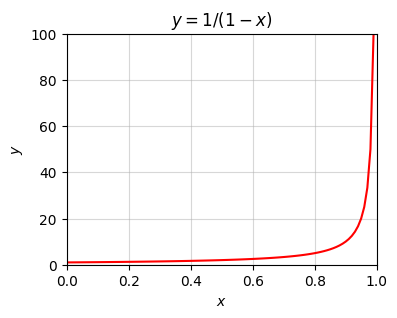

In [44]:
x = np.arange(0, 1, 0.01)
f = lambda x: 1 / (1 - x)
plot_function(x, f, xlim=(0, 1), ylim=(0, 100), set_ticks=False, title='$y=1/(1-x)$')

We can always factor constants $c$ out of sums. This follows naturally from just expanding the sum out,

$$\sum_{i=0}^{n-1} c x_i = cx_0 + cx_1 + \cdots + cx_{n-1} = c(x_0 + x_1 + \cdots + x_{n-1}) = c\sum_{i=0}^{n-1} x_i.$$

Similarly, we can break sums up into pieces (or join sums together) as long as we're careful to get the index limits right,

$$\sum_{i=0}^{n-1} x_i = \sum_{i=0}^{k} x_i + \sum_{i=k+1}^{n-1} x_i.$$

We can have double sums (sums of sums) as well. If $x_{i,j}$ is some 2-index variable where $i=0,\cdots,n-1$ and $j=0,\cdots,m-1$, we can sum over both sets of indices to get $n \cdot m$ total terms,

$$\sum_{i=0}^{n-1} \sum_{j=0}^{m-1} x_{i,j} = \sum_{j=0}^{m-1} \sum_{i=0}^{n-1} x_{i,j} = x_{0,0} + x_{0,1} + \cdots x_{0,m-1} + \cdots + x_{n-1,0} + x_{n-1,1} + \cdots x_{n-1,m-1}.$$

Notice the two sums can swap, or **commute**, with each other, $\sum_i \sum_j = \sum_j \sum_i$. This follows by expanding the terms out like on the right-hand side and noting the must be equal in both cases.

The notation I've covered for sums has an analogue for products, called **product notation**. Suppose we want to multiply $n$ numbers $x_0,x_1,\cdots,x_{n-1}$ together to get some number $x$. We could write

$$x = x_0 \cdot x_1 \cdots x_{n-1},$$

but we have a more compact notation for this as well. Using the symbol $\prod$ in analogy to $\sum$, we can write

$$x = \prod_{i=0}^{n-1} x_i.$$

Read this as "the product of all $x_i$ for $i=0,1,\cdots,n-1$ is $x$".

Unlike sums, python doesn't have a native function to calculate products of elements in a sequence, but numpy has one called `np.prod`. Here's an example of a product.

$$x = \prod_{i=1}^{10} i = 1 \cdot 2 \cdot 3 \cdot 4 \cdot 5 \cdot 6 \cdot 7 \cdot 8 \cdot 9 \cdot 10 = 3628800.$$

In [45]:
np.prod([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

3628800

Luckily, there aren't any common products to remember. It's just worth being familiar with the notation, since we'll occasionally use it.

Products don't obey quite the same properties sums do, so you have to be careful. When in doubt, just write out the product the long way and make sure what you're doing makes sense. For example, pulling a factor $c$ out of a product gives a factor of $c^n$, not $c$, since there are $c$ total products multiplied together,

$$x = \prod_{i=0}^{n-1} cx_i = cx_0 \cdot cx_1 \cdots cx_{n-1} = c^n(x_0 \cdot x_1 \cdots x_{n-1}) = c^n \prod_{i=0}^{n-1} x_i.$$

It's worth noting (because we'll use this fact), that we can turn products into sums by taking the log of the product,

$$\log \bigg(\prod_{i=0}^{n-1} x_i \bigg) = \sum_{i=0}^{n-1} \log x_i.$$

This follows from the rule $\log(x \cdot y) = \log x + \log y$, which extends to arbitrarily many products too.

## Sets

Thus far we've talked about numbers, tuples of numbers, and mappings between them. It's also sometimes useful to think about collections of things. These things may be numbers or they may not. In math these collections of things are called **sets**. Suppose for example we want to simultaneously talk about multiple numbers at once, say -1, 0, and 1. We can put them into a set $S=\{-1, 0, 1\}$, and talk about the set $S$ as representing all of these numbers at once. The only thing that must hold is elements in a set can't repeat, so for example we can't have -1 appearing twice. It's already there. No need to count it twice.

The "things" inside a set are called **elements** of the set. To say $x$ is an element of a set $S$ it's common to use the short-hand $x \in S$. If $x$ is *not* in $S$ we'd similarly write $x \notin S$. For example, if $S=\{-1, 0, 1\}$, then $-1 \in S$, but $2 \notin S$.

Sets can contain more than numbers. We can have a set with nothing at all in it, $S=\{\}$. This is called the **empty set**, and is usually written as $\emptyset$. We can have a set with other sets inside it, like
$$S = \{1, 2, \{3, 4\}\}.$$
We can even do weird things like create new sets from nested empty sets, for example
$$S = \{\emptyset, \{\emptyset\}, \{\emptyset, \{\emptyset\}\}\}.$$

### Set Operations

Just like numbers have arithmetic operations defined on them, sets have arithmetic-like operations defined on them as well.
- The set analogue to addition is called **union**. The union of two sets $S$ and $T$ is just the set that combines their two (unique) elements into one new set. It's usually denoted $S \cup T$. For example,
$$\{-1, 0, 1\} \cup \{1, 2, 3\} = \{-1, 0, 1, 2, 3\}.$$
- The set analogue to multiplication is called **intersection**. The intersection of two sets $S$ and $T$ is the set that contains only the elements in *both* sets. It's usually denoted $S \cap T$. For example, 
$$\{-1, 0, 1\} \cap \{1, 2, 3\} = \{1\}.$$
If the two sets don't contain any common elements then their intersection is empty, $S \cap T = \emptyset$. When the intersection of two sets is empty we say they are **disjoint** sets.
- If a set $S$ only contains some elements of a larger set $T$, we say $S$ is a **subset** of $T$. This is denoted $S \subset T$. For example, 
$$\{0, 1\} \subset \{-1, 0, 1\}.$$
By convention, a set is allowed to be a subset of itself, $T \subset T$. The empty set is also always a subset, $\emptyset \subset T$. We also can say symmetrically that $T$ is a **superset** of $S$.
- The set analogue to negation is called the **complement**. If $S \subset T$, the complement of $S$ is all the elements in $T$ that are *not* in $S$. The complement is usually written $S^C$. For example,
$$\{0, 1\} \subset \{-1, 0, 1\} \quad \Rightarrow \quad \{0, 1\}^C = \{-1\}.$$
Note the complement only makes sense when a set is subset of a larger set. Without knowing what that larger set is, you can't say anything about the complement.
- The set analogue of subtraction is the **set difference**. The set difference of $S$ from the set $T$ is all the elements in $S$ that are not in $T$. This is usually denoted $S \setminus T$. For example,
$$\{-1, 0, 1, 2\} \setminus \{1, 2\} = \{-1, 0\}.$$
- The set analogue of the absolute value is **cardinality**. The cardinality of a set $S$ is just the total number of elements it contains. It's usually denoted $|S|$. For example,
$$\big|\{1, 2, 3, 4, 5\}\big| = 5.$$
- Another operation we can do with sets that doesn't really have an arithmetic equivalent is the **Cartesian product**. If $S$ and $T$ are two sets, define their Cartesian product as the set of all ordered pairs (i.e. tuples) whose first elements are in $S$ and whose second elements are in $T$. This is usually denoted $S \times T$. For example,
$$\{-1, 0\} \times \{1, 2\} = \{(-1, 1), (-1, 2), (0, 1), (0, 2)\}.$$
If $S$ has cardinality $n$ and $T$ cardinality $n$, then $S \times T$ has cardinality $|S| \cdot |T| = n \cdot m$.

For many of these operations, just as with numbers, we can naturally apply them to more than two sets at a time. We can take the union, intersection, and Cartesian product of as many sets we like. The definitions extend as you'd expect.

Though we won't use it a huge amount, I'll briefly mention that python in fact has a data type called `set` that more or less mimics the above properties. Here's an example of how it works using the two sets $S = \{-1, 0, 1, 2\}$, $T = \{1, 2, 3, 4\}$.

In [46]:
S = set([-1, 0, 1, 2])
T = set([1, 2, 3, 4])

In [47]:
S.union(T) # S union T
S.intersection(T) # S intersect T
S.difference(T) # S \ T
S.issubset(T) # is S < T
S.issuperset(T) # is T > S
len(S) # |S|

{-1, 0, 1, 2, 3, 4}

{1, 2}

{-1, 0}

False

False

4

### Bigger Sets

Just like list comprehensions like `[x for x in range(1000) if x > 100]` are a useful way to build lists with large numbers of elements, sets have a similar notation for constructing sets out of larger elements. The equivalent set with the elements of the above list comprehension would be denoted as
$$S = \{x: x=0, 1, \cdots, 999 \text{ and }x > 100\}.$$
This notation is sometimes called "set builder notation", but the term isn't as important as the idea. Read these expression as "the set of all $x$ such that $x$ is an integer between 0 and 999 and $x > 100$".

We can use this notation to talk about sets with infinitely many items too, like the set of all integers or the set of all real numbers. These sets are so important they have special symbols using block-face letters,
- The set of all natural numbers is denoted $\mathbb{N} = \{x : x=0, 1, 2, 3, \cdots\}$.
- The set of all integers is denoted $\mathbb{Z} = \{x : x=\cdots, -1, 0, 1, \cdots\}$.
- The set of all rational numbers is denoted $\mathbb{Q} = \big\{x : x=\frac{a}{b} \text{ where } a, b \in \mathbb{Z} \text{ with } b \neq 0 \big\}$.
- The set of all real numbers is denoted $\mathbb{R} = \{x : x \text{ is real}\}$.

Using the Cartesian product we can "square" these sets to get pairs or triplets of numbers. For example, the set $\mathbb{R}^2 = \mathbb{R} \times \mathbb{R}$ is the set of all pairs of real numbers. That is, the set of all coordinates in the xy-plane. The set $\mathbb{R}^3 = \mathbb{R} \times \mathbb{R} \times \mathbb{R}$ is the set of all triplets of real numbers, i.e. the set of all coordinates in xyz-space.

The final type of sets I'll mention are the **intervals**. These are contiguous subsets of the real numbers. If you think of the real numbers as the number line, intervals are the line segments connecting any two given points. If $a < b$ are two real numbers, we can define a few different intervals between them depending which endpoints we want to include,
- Open interval: $(a, b) = \{x: a < x < b \}$.
- Half-open left interval: $(a, b] = \{x: a < x \leq b \}$.
- Half-open right interval: $[a, b) = \{x: a \leq x < b \}$.
- Closed interval: $[a, b] = \{x: a \leq x \leq b \}$.

### Functions Between Sets

We can define functions abstractly using sets as well. A function is a unique mapping between two sets. If $A$ and $B$ are two sets, then $f:A \rightarrow B$ is a function that maps elements of $A$ to elements of $B$. We can also write $f(a)=b$ when the two sets are understood. In this context we say $A$ is the **domain** of the function $f$, and $B$ is the **codomain** of $f$. 

Note this abstract definition of a function says nothing about the *functional form* of $f$. We still have to define that explicitly by specifying a rule that maps inputs to outputs, e.g. $f(a)=a^2$.

The univariate functions $y=f(x)$ we defined above map real numbers to real numbers, so we could write them $f: \mathbb{R} \rightarrow \mathbb{R}$. The bivariate functions $z=f(x,y)$ we saw could be written $f: \mathbb{R}^2 \rightarrow \mathbb{R}$. Etc.

When $f$ maps every element of $A$ to a *unique* element of $B$ we say $f$ is a **one-to-one** function. One-to-one functions have the useful property that they can be inverted. We can uniquely build a new **inverse** function $f^{-1}$ by reversing the direction of the map, $f^{-1}:B \rightarrow A$. If $f(a)=b$, then $f^{-1}(b)=a$. Note that not every element of $B$ may be a valid input to the inverse function due to the following situation.

It need not always be true that every element of $A$ map to every element of $B$. It could very well be the case for some $b \in B$ that $f(a) \neq b$ for any $a \in A$. When we *can* always find an $a$ such that $f(a)=b$, we say the function $f$ is an **onto** function. Otherwise the set of mappings $f(a)=b$ is a *subset* of $B$, called the **range** of $f$. The range of $f:A \rightarrow B$ is sometimes denoted $f(A)$.

When $f$ is both one-to-one and onto it's said to be a **bijection**. When $f$ is a bijection, not only can we define an inverse mapping $f^{-1}$, but we can define it on all values of $B$. Otherwise we can only define the inverse on $f(A)$.

In machine learning, except perhaps in pure academic research, understanding sets and their notation is pretty much only important when defining what range of values variables are defined on. For example, saying $x \in \mathbb{R}$ for "let $x$ be a real number". For that reason, don't feel the need to go too deep into this stuff unless you're the pure research type.

## Greek Alphabet

Like many other technical fields, machine learning makes heavy use of the Greek alphabet to represent variable names in mathematical equations. While not all Greek characters are used, certain ones are worth being aware of. Below is a [table](https://howtosaymathematics.files.wordpress.com/2011/08/greek-alphabet2.pdf) of the Greek letters upper and lower case, as well as a guide on how to pronounce and write them. You don't need to memorize all of these letters, but they will frequently show up in future lessons, so you may want to reference this table often until you're comfortable with Greek letters.

<img src="../resources/greek.png" width=550>